In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
# Open CSV file
with open('dataset\Restaurant_Sales_Data-Cleaned_Data.csv', newline='') as csvfile:
    # Create CSV reader object
    csv_reader = csv.reader(csvfile, delimiter=',')
    
    # Skip header row
    next(csv_reader)
    
    # Initialize empty list
    rows = []
    
    # Iterate over each row and append data to list
    for row in csv_reader:
        rows.append(row)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=["Dates", "Net Sales", "% Noodles", "Weekdays"])

# Print the DataFrame
# print(df)

In [3]:
# Convert columns to correct format
df['Dates'] = pd.to_datetime(df['Dates'])
df['Net Sales'] = df['Net Sales'].astype(float)
df['% Noodles'] = df['% Noodles'].astype(float)

# Filter data for Event_df and nonEvent_df
Event_df = df[(df['Dates'] >= '2023-07-16') & (df['Dates'] <= '2023-08-31')]
nonEvent_df = df[(df['Dates'] < '2023-07-16') | (df['Dates'] > '2023-08-31')]

# Print the filtered DataFrame
#print(nonEvent_df)
#print(Event_df)

## Data Analysis

### Percent Noodle Distribution during Event vs. Non-event periods

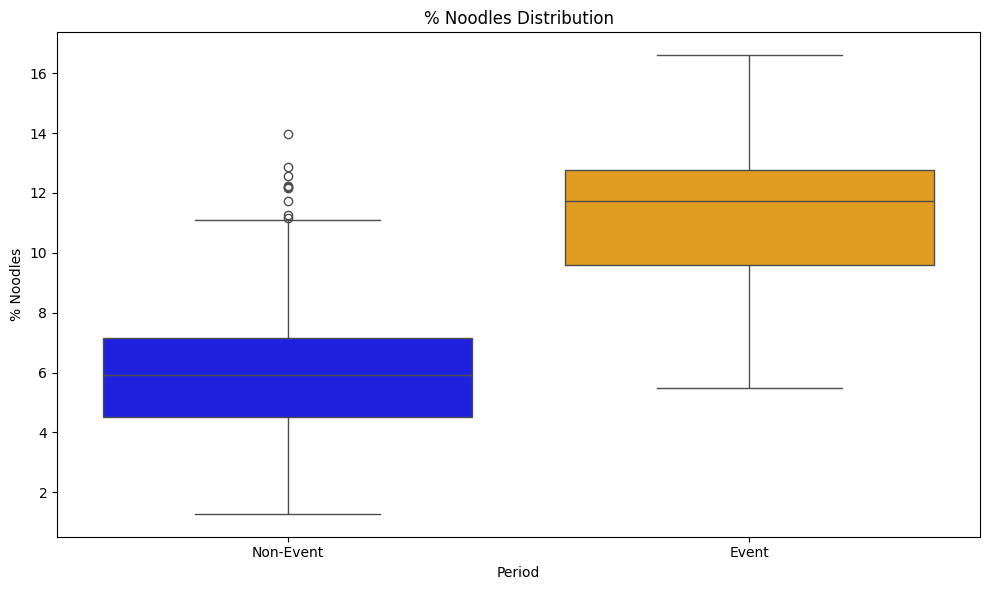

In [4]:
# Created Copies of nonEvent_df and Event_df 
nonEvent_df = nonEvent_df.copy()
Event_df = Event_df.copy()

# Add 'Period' column to both DataFrames
nonEvent_df['Period'] = 'Non-Event'
Event_df['Period'] = 'Event'

# Concatonate into single DF to keep period attributes
combined_df = pd.concat([nonEvent_df, Event_df])

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot box plot for 'Net Sales' based on Period
sns.boxplot(x='Period', y='% Noodles', data=combined_df, hue='Period', palette={'Non-Event': 'blue', 'Event': 'orange'}, legend=False)

# Set labels and title
plt.xlabel('Period')
plt.ylabel('% Noodles')
plt.title('% Noodles Distribution')

# Show plot
plt.tight_layout()
plt.show()

### Net Sales during Event vs. Non-event periods

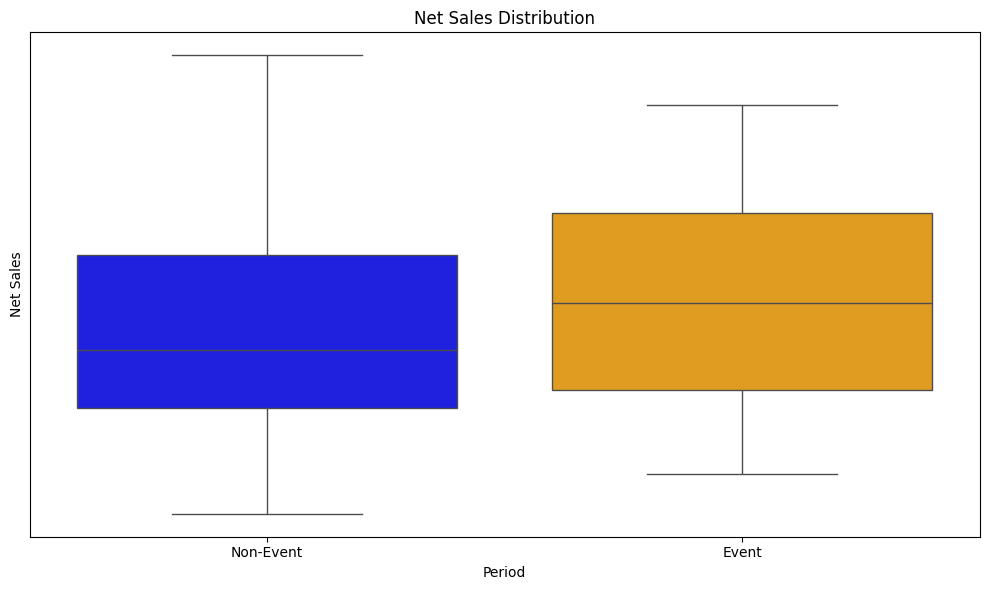

In [5]:
# Created Copies of nonEvent_df and Event_df 
nonEvent_df = nonEvent_df.copy()
Event_df = Event_df.copy()

# Add 'Period' column to both DataFrames
nonEvent_df['Period'] = 'Non-Event'
Event_df['Period'] = 'Event'

# Concatonate into single DF to keep period attributes
combined_df = pd.concat([nonEvent_df, Event_df])

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot combined box plot for 'Net Sales' based on Period
sns.boxplot(x='Period', y='Net Sales', data=combined_df, hue='Period', palette={'Non-Event': 'blue', 'Event': 'orange'}, legend=False)

# Set labels and title
plt.xlabel('Period')
plt.ylabel('Net Sales')
plt.title('Net Sales Distribution')

# Hide ticks and labels on the y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Show plot
plt.tight_layout()
plt.show()

### Net Sales Line Graph

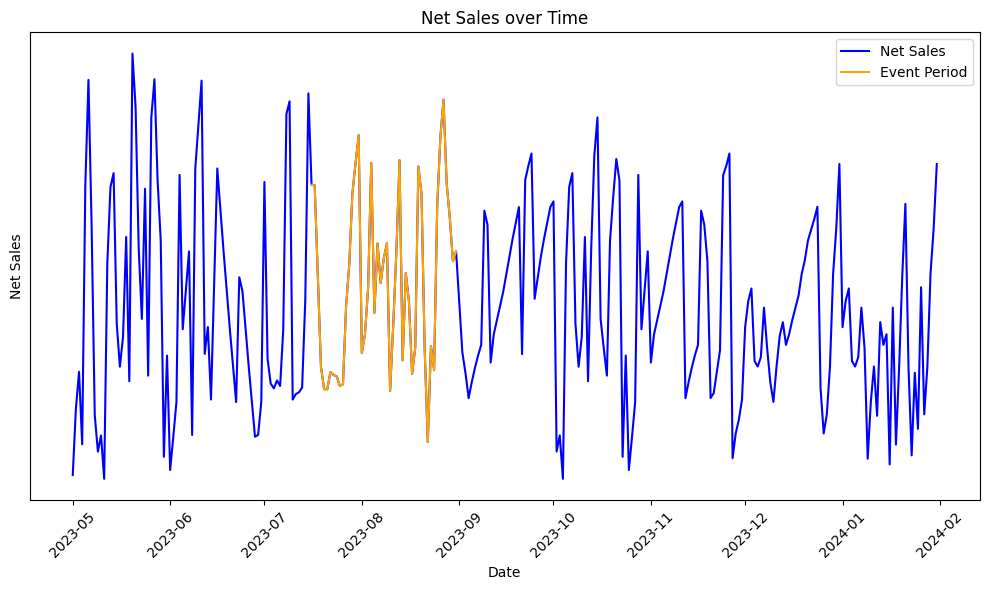

In [6]:
# Create a mask for the specific date range
mask = (df['Dates'] >= '2023-07-16') & (df['Dates'] <= '2023-08-31')

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot 'Net Sales' for nonEvent_df
plt.plot(df['Dates'], df['Net Sales'], label='Net Sales', color='blue')

# Plot 'Net Sales' for the event period with different color
plt.plot(df[mask]['Dates'], df[mask]['Net Sales'], color='orange', label='Event Period')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.title('Net Sales over Time')
plt.legend()

# Remove ticks from y-axis to maintain confidentiality
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Percent Noodles Line Graph

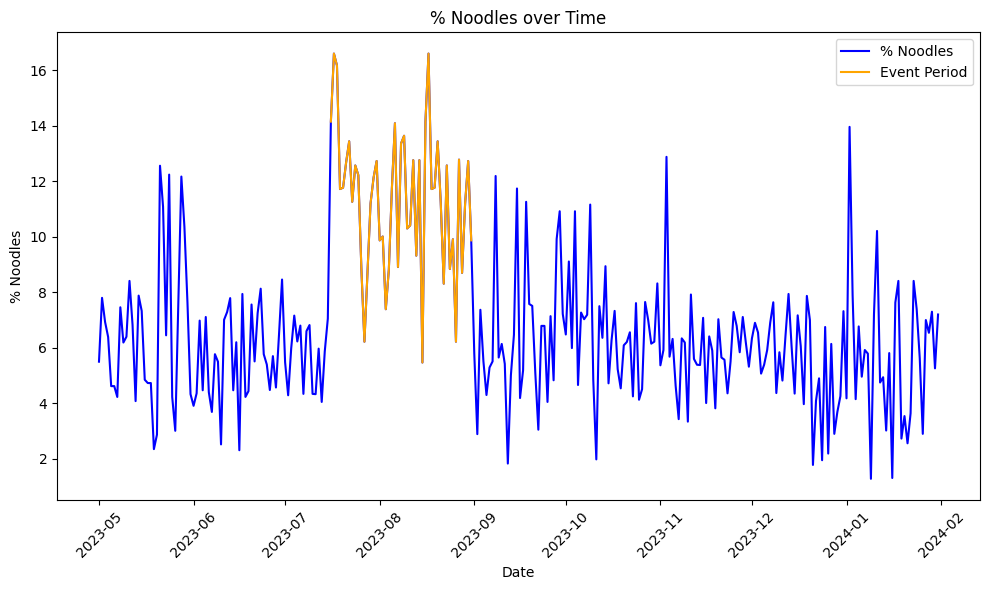

In [7]:
# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot '% Noodles' for nonEvent_df
plt.plot(df['Dates'], df['% Noodles'], label='% Noodles', color='blue')

# Plot '% Noodles' for the event period with a different color
plt.plot(df[mask]['Dates'], df[mask]['% Noodles'], color='orange', label='Event Period')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Noodles')
plt.title('% Noodles over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

## Temperature Analysis

### Add Temperature Dataset to Dataframe

In [8]:
# Read the CSV file into a DataFrame
temp_df = pd.read_csv('dataset/Restaurant Sales_Data-Temperatures.csv')

# Convert the 'Dates' column to datetime format
temp_df['Date'] = pd.to_datetime(temp_df['Date'], format='%m/%d/%Y')

# Concatenate temp_df with df along the columns
sales_temp_df = pd.concat([df, temp_df], axis=1)

sales_temp_df = sales_temp_df.drop(columns=['Date'], axis=1)

print(sales_temp_df)

         Dates  Net Sales  % Noodles   Weekdays  Air Max  Air Min  Soil Max  \
0   2023-05-01    1306.78       5.50     Monday       66       55        66   
1   2023-05-02    1723.91       7.80    Tuesday       64       51        65   
2   2023-05-03    1954.52       6.93  Wednesday       65       51        64   
3   2023-05-04    1499.64       6.39   Thursday       64       52        64   
4   2023-05-05    3125.37       4.62     Friday       65       49        64   
..         ...        ...        ...        ...      ...      ...       ...   
271 2024-01-27    1687.56       7.00   Saturday       81       50        54   
272 2024-01-28    1987.43       6.54     Sunday       79       55        55   
273 2024-01-29    2568.55       7.30     Monday       80       51        54   
274 2024-01-30    2853.36       5.26    Tuesday       67       45        57   
275 2024-01-31    3257.85       7.20  Wednesday       69       48        54   

     Soil Min  
0          65  
1          64  
2  

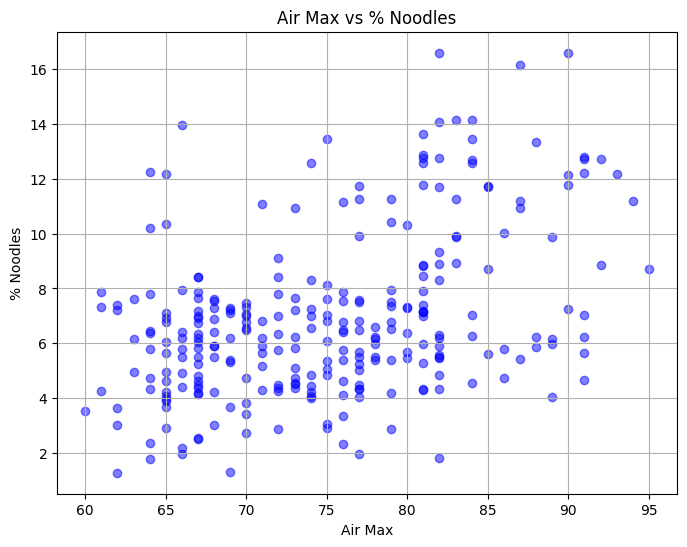

In [9]:
# Plot Air Max vs % Noodles
plt.figure(figsize=(8, 6))
plt.scatter(sales_temp_df['Air Max'], sales_temp_df['% Noodles'], color='blue', alpha=0.5)
plt.title('Air Max vs % Noodles')
plt.xlabel('Air Max')
plt.ylabel('% Noodles')
plt.grid(True)
plt.show()

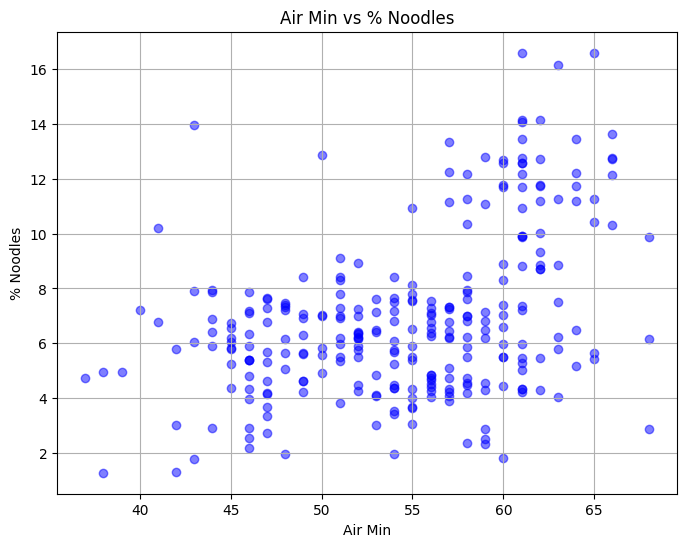

In [10]:
# Plot Air Min vs % Noodles
plt.figure(figsize=(8, 6))
plt.scatter(sales_temp_df['Air Min'], sales_temp_df['% Noodles'], color='blue', alpha=0.5)
plt.title('Air Min vs % Noodles')
plt.xlabel('Air Min')
plt.ylabel('% Noodles')
plt.grid(True)
plt.show()

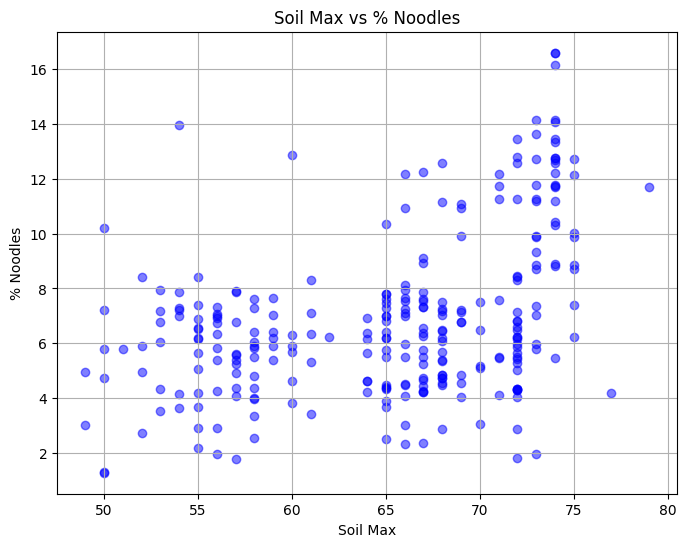

In [11]:
# Plot Soil Max vs % Noodles
plt.figure(figsize=(8, 6))
plt.scatter(sales_temp_df['Soil Max'], sales_temp_df['% Noodles'], color='blue', alpha=0.5)
plt.title('Soil Max vs % Noodles')
plt.xlabel('Soil Max')
plt.ylabel('% Noodles')
plt.grid(True)
plt.show()

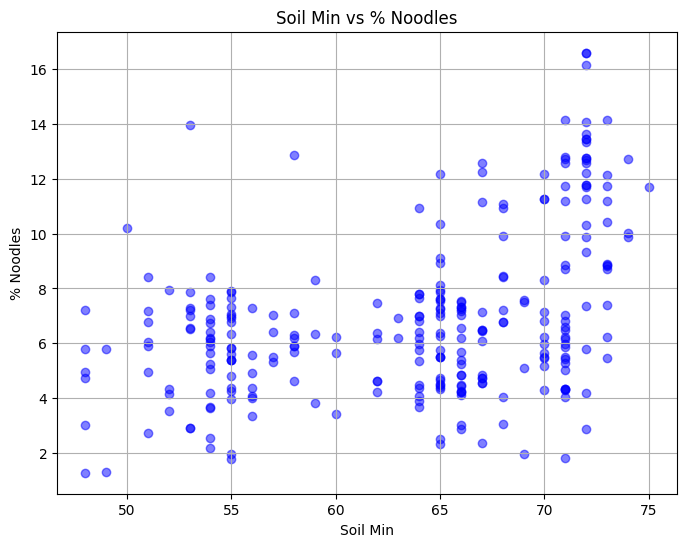

In [12]:
# Plot Soil Max vs % Noodles
plt.figure(figsize=(8, 6))
plt.scatter(sales_temp_df['Soil Min'], sales_temp_df['% Noodles'], color='blue', alpha=0.5)
plt.title('Soil Min vs % Noodles')
plt.xlabel('Soil Min')
plt.ylabel('% Noodles')
plt.grid(True)
plt.show()

In [13]:
# Convert 'Dates' column to datetime format
sales_temp_df['Dates'] = pd.to_datetime(sales_temp_df['Dates'])

# Extract month from Dates column
sales_temp_df['Month'] = sales_temp_df['Dates'].dt.month

# Group by month and calculate average % Noodle
average_noodle_by_month = sales_temp_df.groupby('Month')['% Noodles'].mean()

print(average_noodle_by_month)

Month
1      5.750968
5      6.639032
6      5.656333
7      8.958387
8     10.933226
9      6.422000
10     6.523548
11     5.942333
12     5.437419
Name: % Noodles, dtype: float64


In [14]:
# Convert 'Dates' column to datetime format
sales_temp_df['Dates'] = pd.to_datetime(sales_temp_df['Dates'])

# Remove duplicates from the 'Dates' column
sales_temp_df = sales_temp_df.drop_duplicates(subset=['Dates'])

# Extract month from Dates column
sales_temp_df['Month'] = sales_temp_df['Dates'].dt.month

# Group by month and calculate average Air Max
average_air_max_by_month = sales_temp_df.groupby('Month')['Air Max'].mean()

print(average_air_max_by_month)

Month
1     66.903226
5     68.161290
6     72.466667
7     84.225806
8     83.806452
9     79.200000
10    78.741935
11    74.466667
12    66.709677
Name: Air Max, dtype: float64


In [15]:
average_by_month = pd.concat([average_air_max_by_month, average_noodle_by_month], axis=1)
average_by_month.columns = ['Average Air Max', 'Average % Noodles']

print(average_by_month)

       Average Air Max  Average % Noodles
Month                                    
1            66.903226           5.750968
5            68.161290           6.639032
6            72.466667           5.656333
7            84.225806           8.958387
8            83.806452          10.933226
9            79.200000           6.422000
10           78.741935           6.523548
11           74.466667           5.942333
12           66.709677           5.437419


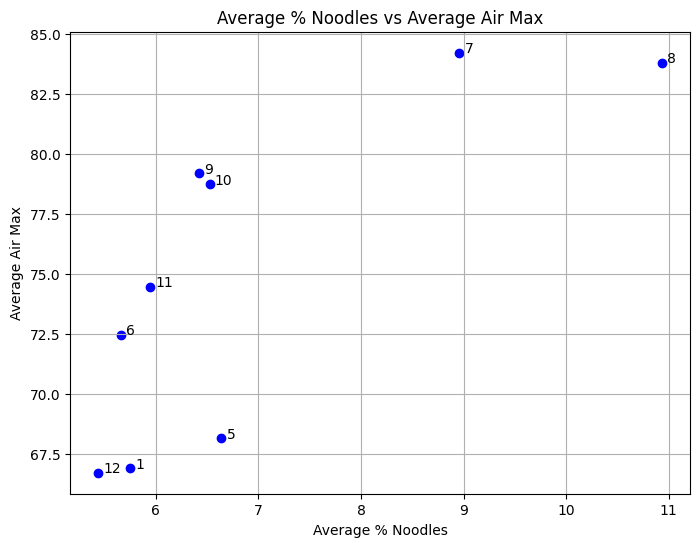

In [24]:

# Plot the scatter graph of average % Noodles vs average Air Max with flipped axes
plt.figure(figsize=(8, 6))
plt.scatter(average_by_month['Average % Noodles'], average_by_month['Average Air Max'], color='blue')
plt.title('Average % Noodles vs Average Air Max')
plt.xlabel('Average % Noodles')
plt.ylabel('Average Air Max')
plt.grid(True)

# Annotate each point with its month
for i, month in enumerate(average_by_month.index):
    x = average_by_month.iloc[i]['Average % Noodles']
    y = average_by_month.iloc[i]['Average Air Max']
    plt.annotate(month, (x, y), xytext=(x + 0.05, y ))

plt.show()